**Punto 1**

Desde Galileo sabemos que los cuerpos en el vacío caen al mismo tiempo, independientemente de su
masa. ¿Pero qué pasa si estos cuerpos van sobre ruedas? Considere un plano inclinado a un ángulo
𝜃 = 30°, desde el cual lanzaremos varios carros desde la misma altura 𝐻.

Los carros son idénticos, de masa 𝑚, pero cada uno llevará encima una masa variable 𝑀. Asumiremos que hay buen agarre entre las ruedas del carro y el plano inclinado, por lo que la fricción entre
estas dos superficies es estática y hace trabajo nulo.
Sin embargo, las ruedas al rotar producen fricción líquida en sus rodamientos, la cual asumiremos
que es independiente de la masa que llevan los carros encima, como debería esperarse para rodamientos
de alta calidad. Modelaremos esta fricción líquida como un término 𝛾 ‖𝑣⃗
2
‖ que resta en la ecuación de
fuerzas en la dirección de la velocidad:
𝑚𝑎⃗= −𝑚𝑔⃗+ 𝑁⃗− 𝛾 ‖𝑣‖⃗
2 𝑣̂
La pregunta que queremos responder es, teniendo en cuenta este sistema, ¿el tiempo de caída de los
carros depende de la masa que llevan encima?
Plantee las ecuaciones diferenciales por componentes y use alguno de los métodos vistos en clase
para simular la caída de muchos carros con diferentes masas encima.

Realice un gráfico de masa total
vs tiempo de caída (el tiempo cuando 𝑦(𝑡) = 0), y escriba sus conclusiones.
Para ver más fácilmente los efectos, recomiendo usar un coeficiente de fricción grande, digamos del
orden de 0.7 kg/m, y masas del orden de kilogramos.

Extra: anime la posición 2D de los “carros” cayendo al mismo tiempo, cada uno como un punto cuyo
color representa su masa total. Use una escala de color continua.

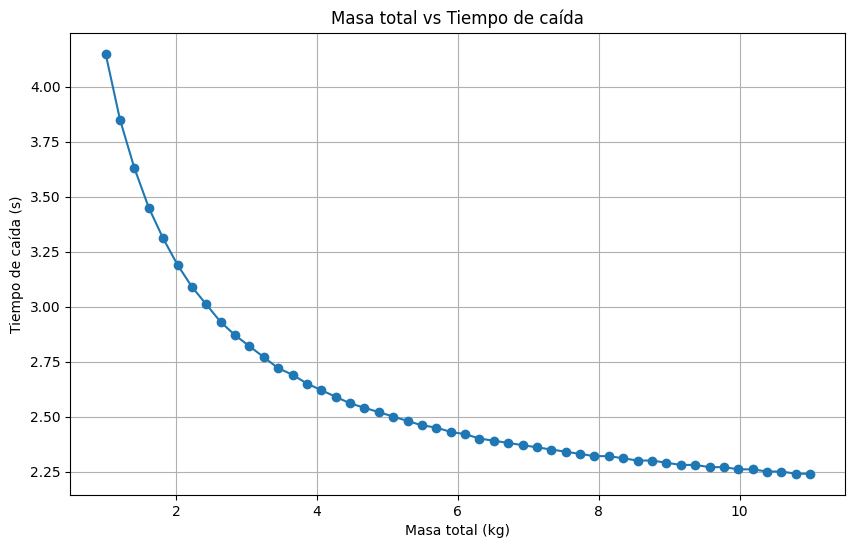

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81
theta = np.radians(30)
gamma = 0.7
H = 10

def equation(t, v, m_total):
    return g * np.sin(theta) - (gamma / m_total) * v**2

def tiempo_de_caida(m, M):
    m_total = m + M
    v0 = 0
    t_eval = np.linspace(0, 100, 10000)

    sol = solve_ivp(equation, [0, 100], [v0], args=(m_total,), t_eval=t_eval)

    y = H - np.cumsum(sol.y[0]) * (t_eval[1] - t_eval[0])

    tiempo_caida = t_eval[np.where(y <= 0)[0][0]]
    return tiempo_caida

m = 1.0
masas = np.linspace(0, 10, 50)
tiempos = []

for M in masas:
    t_caida = tiempo_de_caida(m, M)
    tiempos.append(t_caida)

plt.figure(figsize=(10, 6))
plt.plot(masas + m, tiempos, marker='o')
plt.xlabel('Masa total (kg)')
plt.ylabel('Tiempo de caída (s)')
plt.title('Masa total vs Tiempo de caída')
plt.grid(True)
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import clear_output
import time

g = 9.81
angulo = np.radians(30)
c = 0.7
h = 10
dt = 0.05

# Ecuaciones de movimiento
def eq_movimiento(t, v, M):
    return g * np.sin(angulo) - (c / M) * (v**2)

# Simulación de caída
def eq_caida(m_1, m_2):
    masa_total = m_1 + m_2
    v_0 = 0
    t_eval = np.arange(0, 100, dt)
    sol = solve_ivp(eq_movimiento, [0, 100], [v_0], args=(masa_total,), t_eval=t_eval)
    y = h - np.cumsum(sol.y[0]) * dt
    x = y * np.tan(angulo)
    tiempo_en_la_caida = t_eval[np.where(y <= 0)[0][0]]
    return x, y, tiempo_en_la_caida, sol.t

masa_carro = 1.0
masas_agregadas = np.linspace(0, 10, 20)
trayectorias = []

for masa_agregada in masas_agregadas:
    x, y, tiempo_en_la_caida, t = eq_caida(masa_carro, masa_agregada)
    trayectorias.append((x, y, t, masa_carro + masa_agregada))

def animar_carros(trayectorias):
    plt.figure(figsize=(12, 8))
    plt.plot([0, max([max(x) for x, _, _, _ in trayectorias])], [h, 0], 'k--')  # Línea del plano inclinado

    # Crear colores basados en la masa
    colores = [plt.cm.viridis(masa / max([masa for _, _, _, masa in trayectorias])) for _, _, _, masa in trayectorias]

    for i in range(len(trayectorias[0][2])):
        clear_output(wait=True)
        plt.cla()

        plt.plot([0, max([max(x) for x, _, _, _ in trayectorias])], [0, h], 'k--')

        for (x, y, t, masa), color in zip(trayectorias, colores):
            if i < len(x):
                plt.scatter(x[i], y[i], color=color, s=50)

        plt.xlim(0, max([max(x) for x, _, _, _ in trayectorias]))
        plt.ylim(0, h)
        plt.title('Caída de carros en un plano inclinado')
        plt.xlabel('Posición horizontal (m)')
        plt.ylabel('Altura (m)')
        plt.pause(0.01)

    plt.show()

animar_carros(trayectorias)


KeyboardInterrupt: 

**Carros animados:**

Esto es lo mismo de arriba, sin embargo se usa una imagen de un carro, si presenta problemas entonces el codigo de arriba puede representar a los carros sin nigún problema.

KeyboardInterrupt: 

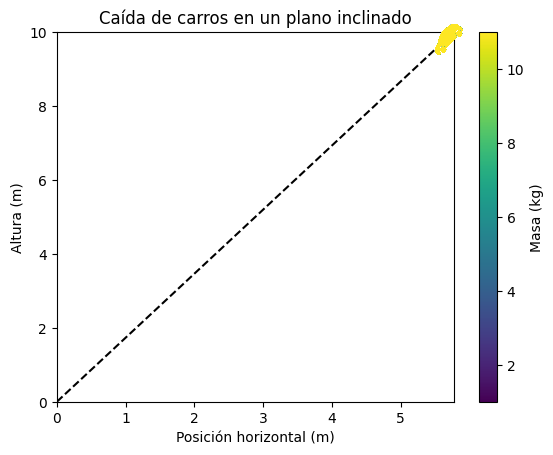

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

g = 9.81
angulo = np.radians(30)
c = 0.7
h = 10
dt = 0.05

def eq_movimiento(t, v, M):
    return g * np.sin(angulo) - (c / M) * (v**2)

def eq_caida(m_1, m_2):
    masa_total = m_1 + m_2
    v_0 = 0
    t_eval = np.arange(0, 100, dt)
    sol = solve_ivp(eq_movimiento, [0, 100], [v_0], args=(masa_total,), t_eval=t_eval)
    y = h - np.cumsum(sol.y[0]) * dt
    x = y * np.tan(angulo)
    tiempo_en_la_caida = t_eval[np.where(y <= 0)[0][0]]
    return x, y, tiempo_en_la_caida, sol.t

masa_carro = 1.0
masas_agregadas = np.linspace(0, 10, 20)
trayectorias = []

for masa_agregada in masas_agregadas:
    x, y, tiempo_en_la_caida, t = eq_caida(masa_carro, masa_agregada)
    trayectorias.append((x, y, t, masa_carro + masa_agregada))

# Cargar Imagen
def get_colored_car_image(masa, max_masa):
    img = plt.imread("Carro_Silueta_Gris_.png")

    # Color
    color = plt.cm.viridis(masa / max_masa)

    img_normalized = img[:, :, :3] / img[:, :, :3].max()

    # Aplicar el color
    colored_img = img_normalized * color[:3]

    alpha_channel = img[:, :, 3]
    colored_img = np.dstack((colored_img, alpha_channel))

    return OffsetImage(colored_img, zoom=0.1)

# Animación:
def animar_carros(trayectorias):
    plt.figure(figsize=(12, 8))

    max_masa = max([masa for _, _, _, masa in trayectorias])
    min_masa = min([masa for _, _, _, masa in trayectorias])

    for i in range(len(trayectorias[0][2])):
        clear_output(wait=True)
        plt.cla()

        plt.plot([0, max([max(x) for x, _, _, _ in trayectorias])], [0, h], 'k--')

        for (x, y, t, masa) in trayectorias:
            if i < len(x):
                # Añadir la imagen del carro con el color correspondiente a la masa
                ab = AnnotationBbox(get_colored_car_image(masa, max_masa), (x[i], y[i]), frameon=False)
                plt.gca().add_artist(ab)

        # Indice color según masa:
        sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min_masa, vmax=max_masa))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca())
        cbar.set_label('Masa (kg)')

        plt.xlim(0, max([max(x) for x, _, _, _ in trayectorias]))
        plt.ylim(0, h)
        plt.title('Caída de carros en un plano inclinado')
        plt.xlabel('Posición horizontal (m)')
        plt.ylabel('Altura (m)')
        plt.pause(0.01)

    plt.show()

animar_carros(trayectorias)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Punto 3**

La ecuación de Schrödinger fue controversial en su día, mucho antes de que existiera cualquier interpretación de la mecánica cuántica. Parte de esta controversia se debía a que no reproducía algunos
efectos encontrados en espectros atómicos, pero también estaba la preocupación de que dicha ecuación
producía soluciones divergentes, aún en los casos más sencillos.
Ignorando la filosofía del asunto, el caso más sencillo es la ecuación aplicada al oscilador armónico,
que, en su forma adimensional, dice

𝑥2𝑓(𝑥) −d^2𝑓(𝑥)/d𝑥2 = 2𝐸𝑓(𝑥)

Donde 𝑥 es la posición, 𝑓(𝑥) es una onda que de alguna manera caracteriza la partícula oscilando, y 𝐸 es
algún tipo de energía asociada a esta onda. El problema era que la solución de esta ecuación diferencial
era divergente para la mayoría de valores de 𝐸. Sólo algunos valores muy específicos retornaban una
solución de 𝑓(𝑥) que no divergía con 𝑥 grande.
Su tarea es solucionar numéricamente el sistema para muchos valores de 𝐸, y encontrar así
las energías “permitidas” del sistema.


Energías permitidas (forma simétrica): [21.636636636636638]
Energías permitidas (forma antisimétrica): [13.516516516516516, 15.582582582582582, 17.792792792792792, 17.816816816816818, 20.26726726726727, 20.29129129129129]


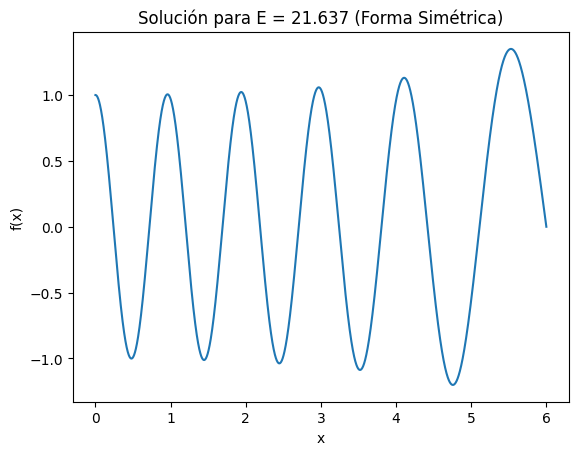

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def solve_schrodinger(E, N=5000, x_max=6, form='symmetric'):
    x = np.linspace(0, x_max, N)
    dx = x[1] - x[0]  # Paso espacial
    f = np.zeros(N)

    # Condiciones iniciales
    if form == 'symmetric':
        f[0] = 1
        f[1] = 1
    elif form == 'antisymmetric':
        f[0] = 0
        f[1] = dx

    for i in range(1, N-1):
        f[i+1] = 2*f[i] - f[i-1] + dx**2 * (x[i]**2 - 2*E) * f[i]

    return x, f

def check_convergence(f, tolerance=1e-2):
    return np.abs(f[-1]) < tolerance

def find_allowed_energies(E_values, N=5000, x_max=6, form='symmetric'):
    allowed_energies = []
    for E in E_values:
        x, f = solve_schrodinger(E, N, x_max, form)
        if check_convergence(f):
            allowed_energies.append(E)
        if len(allowed_energies) >= 6:
            break
    return allowed_energies


E_values = np.linspace(1, 25, 1000)

allowed_energies_symmetric = find_allowed_energies(E_values, form='symmetric')
print("Energías permitidas (forma simétrica):", allowed_energies_symmetric)

allowed_energies_antisymmetric = find_allowed_energies(E_values, form='antisymmetric')
print("Energías permitidas (forma antisimétrica):", allowed_energies_antisymmetric)

if allowed_energies_symmetric:
    x, f_solution = solve_schrodinger(allowed_energies_symmetric[0], form='symmetric')
    plt.plot(x, f_solution)
    plt.title(f"Solución para E = {allowed_energies_symmetric[0]:.3f} (Forma Simétrica)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
else:
    print("No se encontraron energías permitidas para la forma simétrica.")




**Bono:**

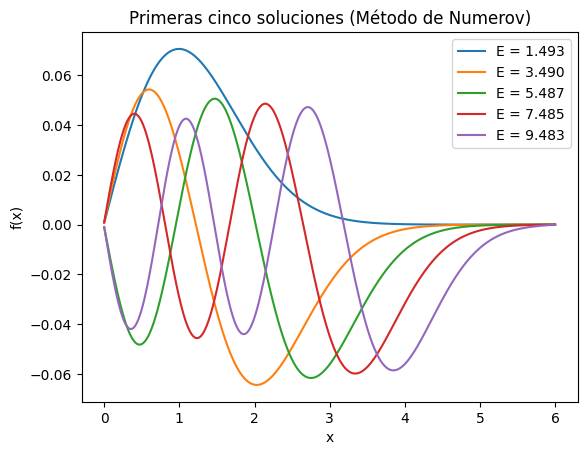

Las cinco energías más bajas son:
E1 = 1.493231
E2 = 3.489821
E3 = 5.487239
E4 = 7.485064
E5 = 9.483179


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

N = 1000
x_max = 6
x = np.linspace(0, x_max, N)
dx = x[1] - x[0]

L = np.zeros((N, N))
for i in range(1, N-1):
    L[i, i] = -2
    L[i, i-1] = L[i, i+1] = 1

L[0, 0] = L[N-1, N-1] = -2
L[0, 1] = L[N-1, N-2] = 1
L /= dx**2

V = np.diag(x**2)
S = 0.5 * (V - L)

eigenvalues, eigenvectors = eig(S)

sorted_indices = np.argsort(eigenvalues)
lowest_energies = np.real(eigenvalues[sorted_indices[:5]])
lowest_eigenvectors = eigenvectors[:, sorted_indices[:5]]

for i in range(5):
    plt.plot(x, lowest_eigenvectors[:, i], label=f'E = {lowest_energies[i]:.3f}')

plt.title("Primeras cinco soluciones (Método de Numerov)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

print("Las cinco energías más bajas son:")
for i, energy in enumerate(lowest_energies):
    print(f"E{i+1} = {energy:.6f}")
